In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dataset.csv")

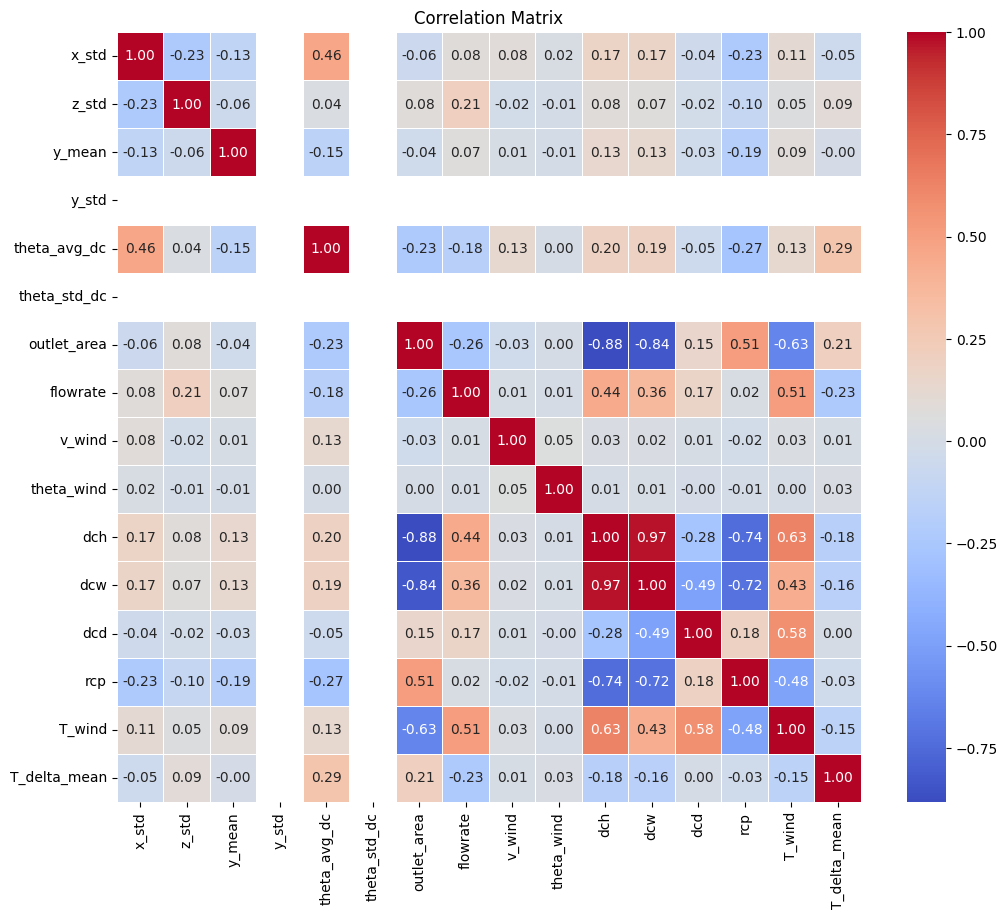

In [3]:
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

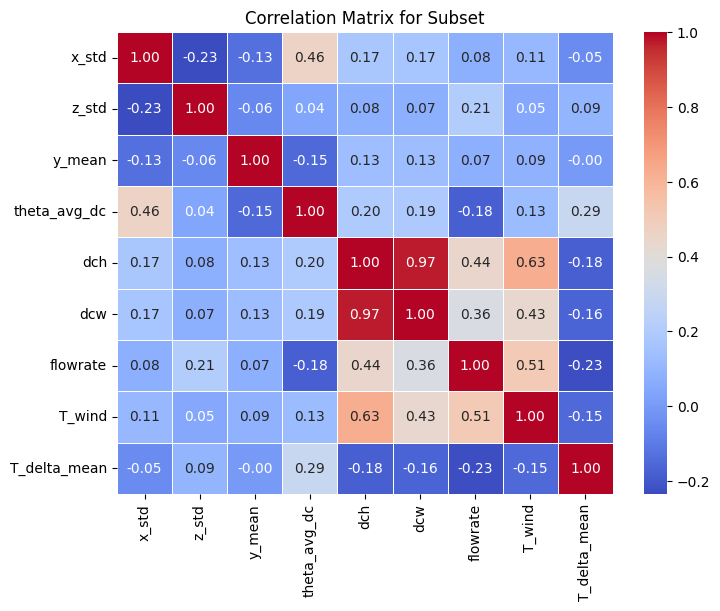

In [4]:
subset_columns = ['x_std', 'z_std', 'y_mean', 'theta_avg_dc', 'dch', 'dcw', 'flowrate', 'T_wind', 'T_delta_mean']
subset_correlation_matrix = df[subset_columns].corr()

# Create a heatmap for the subset
plt.figure(figsize=(8, 6))
sns.heatmap(subset_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix for Subset")
plt.show()

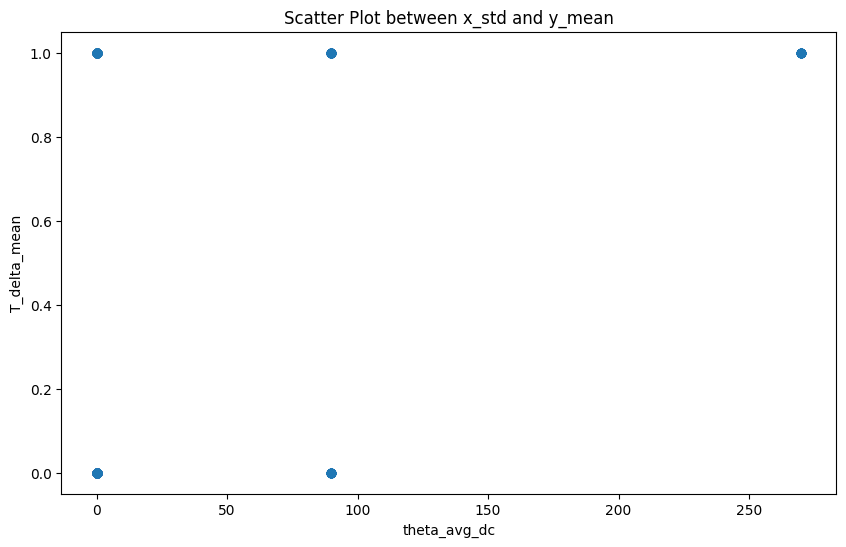

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(df['theta_avg_dc'], df['T_delta_mean'])
plt.title('Scatter Plot between x_std and y_mean')
plt.xlabel('theta_avg_dc')
plt.ylabel('T_delta_mean')
plt.show()

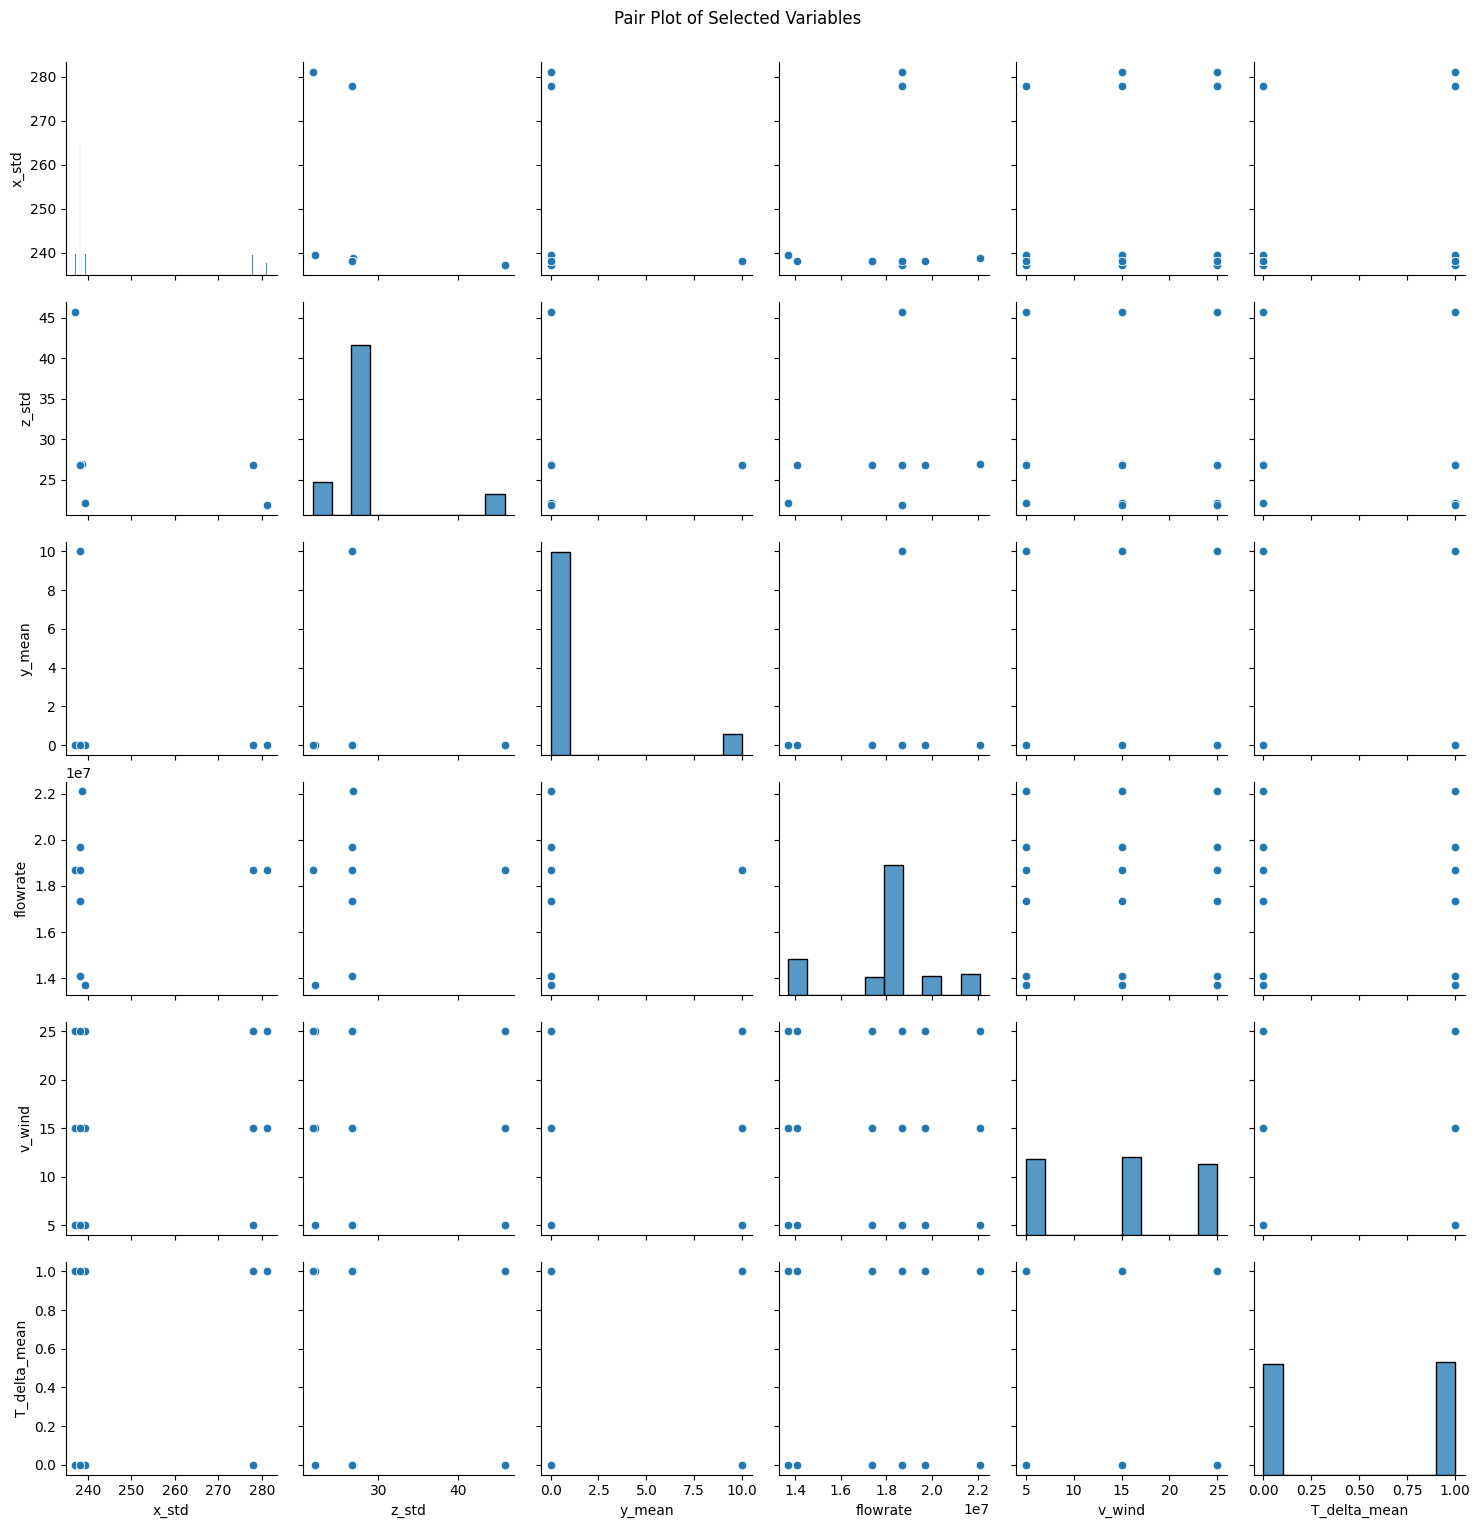

In [6]:
scatter_variables = ['x_std', 'z_std', 'y_mean', 'flowrate', 'v_wind', 'T_delta_mean']

# Pair plot using Seaborn
sns.pairplot(df[scatter_variables])
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()

In [7]:


# Assuming your DataFrame is named 'df'

# Filter numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Find unique values for each numerical column
unique_values_per_column = {col: df[col].unique() for col in numerical_columns}


In [8]:
# Load your dataset
df = pd.read_csv("dataset.csv")

# Step 1: Understand the Data


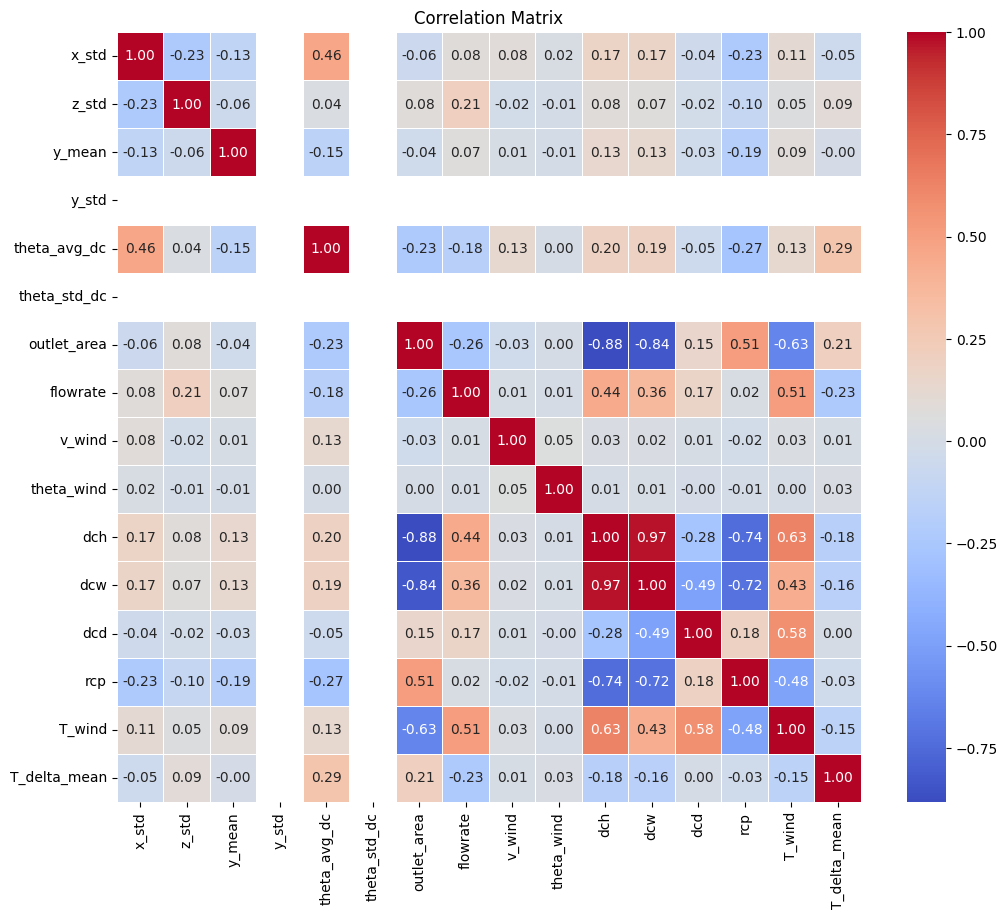

In [9]:
# Step 3: Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [10]:
df = df.drop(['x_std','z_std','y_mean','y_std','theta_std_dc','v_wind', 'theta_wind','dcd','rcp'], axis=1)

In [11]:
df.head(1)

,theta_avg_dc,outlet_area,flowrate,dch,dcw,T_wind,T_delta_mean
0,0,1879.2,18699822,15.3,12,105,1


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
# Selecting features using a RandomForestClassifier as an example
X = df.drop('T_delta_mean', axis=1)  # Features
y = df['T_delta_mean']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:

# Train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Feature importance
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)

# Select features with importance above a threshold
sfm = SelectFromModel(clf, threshold=0.05)
sfm.fit(X_train, y_train)

selected_features = X.columns[sfm.get_support()]


In [14]:
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['theta_avg_dc', 'outlet_area', 'flowrate', 'dch', 'dcw'], dtype='object')


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Assuming 'selected_features' contains the features selected during feature selection
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_selected)

# Evaluate the model
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score:
0.6730769230769231

Confusion Matrix:
[[18  8]
 [ 9 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.69      0.68        26
           1       0.68      0.65      0.67        26

    accuracy                           0.67        52
   macro avg       0.67      0.67      0.67        52
weighted avg       0.67      0.67      0.67        52

